<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Neural_Network_Regression_with_TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a continuous value based on some other combination of variables, even shorter... predicting a number.

In [201]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

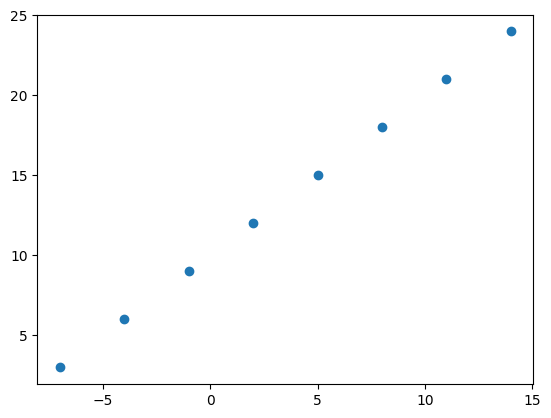

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [203]:
# y = X + 10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [204]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(['bedroom', 'bedroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [205]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [206]:
X[0].ndim

0

In [207]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [208]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

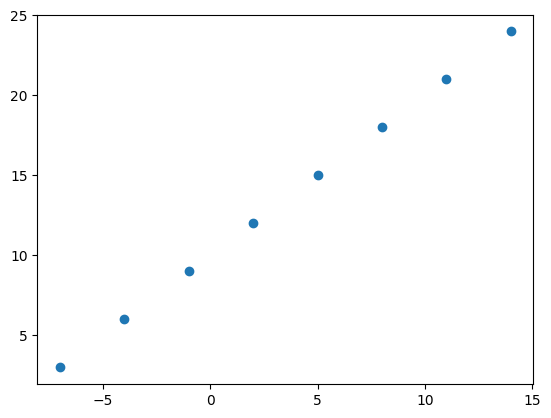

In [209]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

1. **Creating a model** - defing the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [210]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 319ms/step - loss: 12.7810 - mae: 12.7810
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 12.6485 - mae: 12.6485
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 12.5160 - mae: 12.5160
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 12.3835 - mae: 12.3835
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 12.2510 - mae: 12.2510


In [211]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [212]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[6.517116]], dtype=float32)

### Improve the model

We can improve our model, by altering the steps we took to create a model

1. **Create a model** - here we might add more layers, increase the no. of hidden layers, change the activation func of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization func.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [213]:
# Let's rebuild our model
tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 877ms/step - loss: 13.6972 - mae: 13.6972
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6748 - mae: 10.6748
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9861 - mae: 6.9861
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 5.5396 - mae: 5.5396
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 5.9368 - mae: 5.9368
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 4.5518 - mae: 4.5518
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 4.1031 - mae: 4.1031
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 4.1927 - mae: 4.1927
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 3.6772 - mae: 3.6772
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 3.7985 - mae: 3.7985
Epoch 11/100
1/1 [==============================] - 0s 12ms/step

In [214]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [215]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[24.683044]], dtype=float32)

### Common ways to improve a Deep Learning model
- Adding Layers
- Increase the number of hidden units
- Change the activation function of each layer
- Change the optimization function
- Change the learning rate of the optimization function
- Fitting on more data
- Fitting for longer

### Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> Fit it -> evaluate it -> tweak a model -> fit it -> tweak a model -> fit it...
```

When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, Visualize,..."

It's a good idea to visualize:
* The data - what data are working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [216]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make labels for the dataset
Y = X + 10

X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

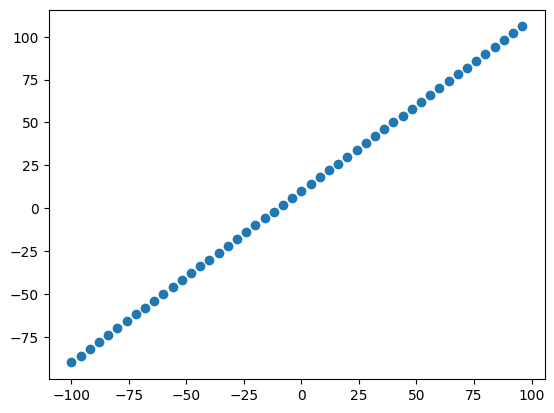

In [217]:
# Visualize the data
plt.scatter(X, Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70%-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [218]:
### Split the data into train and test sets
X_train = X[:40]
y_train = Y[:40]

X_test = X[40:]
y_test = Y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the data
Now we've got our data in training and test sets... let's visualize it again!

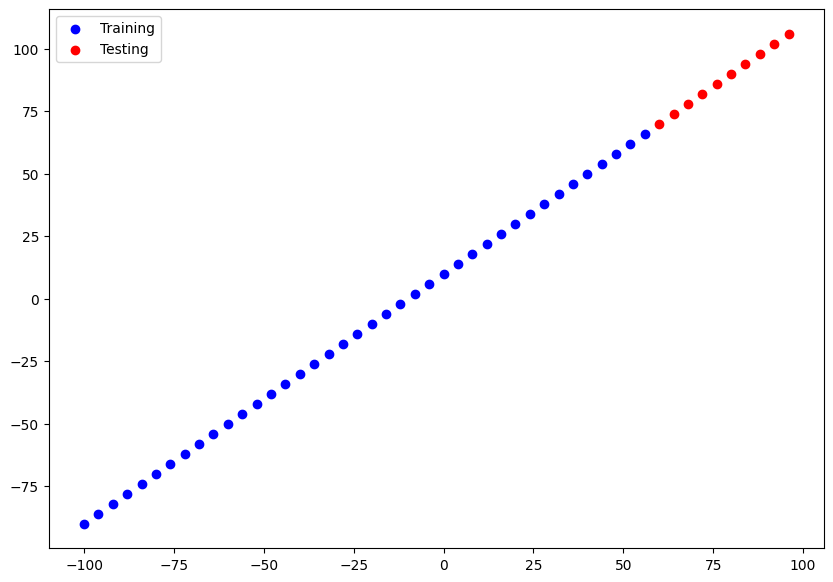

In [219]:
plt.figure(figsize=(10, 7))

# Plot training in blue
plt.scatter(X_train, y_train, c="b", label="Training")
# Plot validation in red
plt.scatter(X_test, y_test, c="r", label="Testing")
# Show a legend
plt.legend();

In [220]:
# Let's look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model_1
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

# # 3. Fit the model_1
# model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualize our model

In [221]:
# model_1.summary() Will throw an error (since it wasn't .build() yet)

In [222]:
# Build our model
model_1.build(input_shape=(None, 1))
model_1.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [223]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
], name='model_2')

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [224]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total no. of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖**Resource:** For more in-depth overview of the trainable parameters with a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=QDX-1M5Nj7s).

📑**Exercise:** Try playing around with the no. of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [225]:
# Let's fit our model to the training data
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [226]:
# Get a summary of our model
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


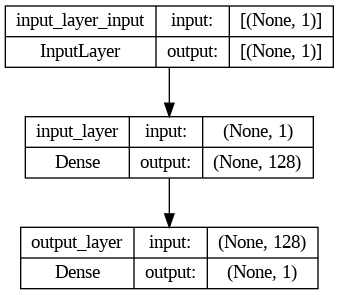

In [227]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model predictions).

In [228]:
# Make some predictions
y_pred = model_2.predict(X_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[ 72.78808 ],
       [ 77.63158 ],
       [ 82.475075],
       [ 87.318565],
       [ 92.16206 ],
       [ 97.00556 ],
       [101.84905 ],
       [106.69255 ],
       [111.53604 ],
       [116.37954 ]], dtype=float32)

In [229]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to create a function for it.

In [230]:
# Let's create a plotting a function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''
  Plots training data, testing data, and compares the predictions to the ground truth labels.
  '''
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training")
  # Plot testing data in red
  plt.scatter(test_data, test_labels, c="lightgreen", label="Testing")
  # Plot the predictions in green
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  # Show the plot
  plt.show();

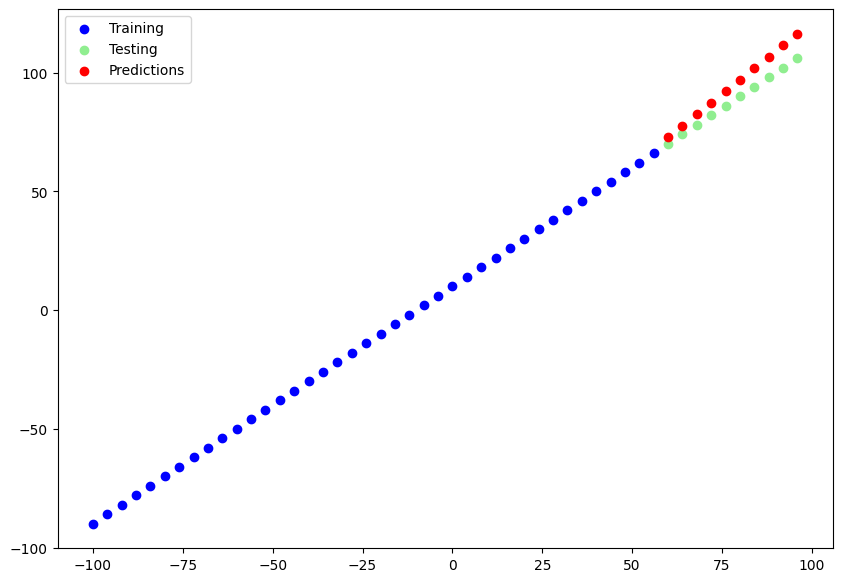

In [231]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression metrics

Depending on the problem you're working on, there will be different evaluation metrics your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"

`(tf.keras.losses.MAE())`
`tf.keras.losses.mean_absolute_error`
* **MSE** - mean square error, "square the average errors"

`tf.keras.losses.MSE()`
`tf.keras.losses.mean_squared_error`

In [232]:
# Evaluate the model on the test
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 6.5838 - mae: 6.5838


[6.583807945251465, 6.583807945251465]

In [233]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.5838103>

In [234]:
y_pred

array([[ 72.78808 ],
       [ 77.63158 ],
       [ 82.475075],
       [ 87.318565],
       [ 92.16206 ],
       [ 97.00556 ],
       [101.84905 ],
       [106.69255 ],
       [111.53604 ],
       [116.37954 ]], dtype=float32)

In [235]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [236]:
# Calculate the mean squared error
mse = tf.keras.losses.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(tf.constant(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=49.21631>

🔑**Note:** Combination of MSE and MAE is called Huber Loss. Less sensitive to outliers than MSE

`tf.keras.losses.Huber()`

In [237]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true=y_true,
                                             y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true=y_true,
                                            y_pred=y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it
-> evaluate it -> tweak it -> fit it -> evaluate it - > repeat
```

1. Get more data - get more examples to train on (more opportunities to learn patterns or relationships b/w features and labels).
2. Make your model larger (using more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 3 layers, trained for 500 epochs

**Build `model_1`**

In [238]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 108.3176 - mae: 108.3176
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 72.8621 - mae: 72.8621
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 35.3170 - mae: 35.3170
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.0155 - mae: 8.0155
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8300 - mae: 12.8300
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9216 - mae: 7.9216
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1212 - mae: 12.1212
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5683 - mae: 7.5683
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5506 - mae: 7.5506
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5910 - mae: 12.5910
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

1/1 [==============================] - 0s 72ms/step


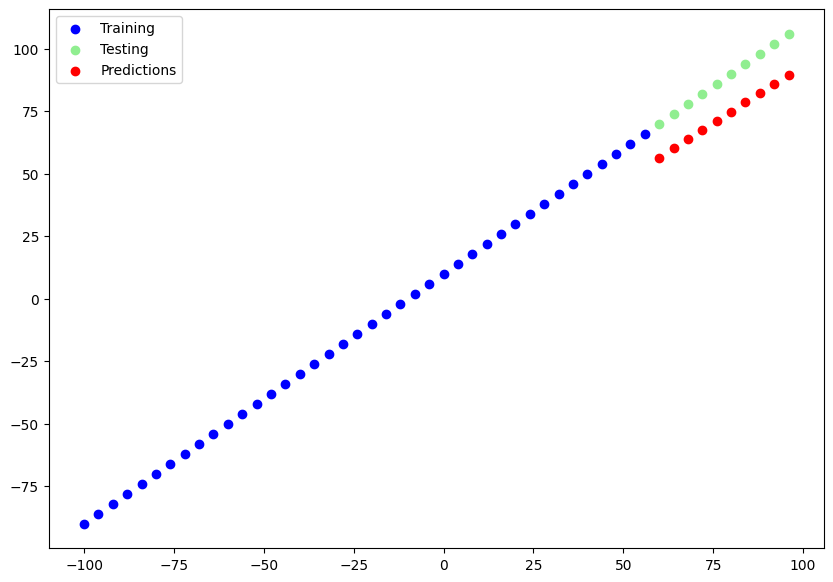

In [239]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_preds_1)

In [240]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(tf.constant(y_preds_1)))
mse_1 = mse(y_test, tf.squeeze(tf.constant(y_preds_1)))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.995496>,
 <tf.Tensor: shape=(), dtype=float32, numpy=225.71538>)

**Build `model_2`

* 2 dense layers trained for 100 epochs

In [241]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 1430.9255 - mse: 1430.9255
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 311.6610 - mse: 311.6610
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 173.3574 - mse: 173.3574
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 84.5711 - mse: 84.5711
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 41.7735 - mse: 41.7735
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 30.3296 - mse: 30.3296
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 27.0439 - mse: 27.0439
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 26.3718 - mse: 26.3718
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 37.2860 - mse: 37.2860
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.8534 - mse: 25.8534
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 50ms/step


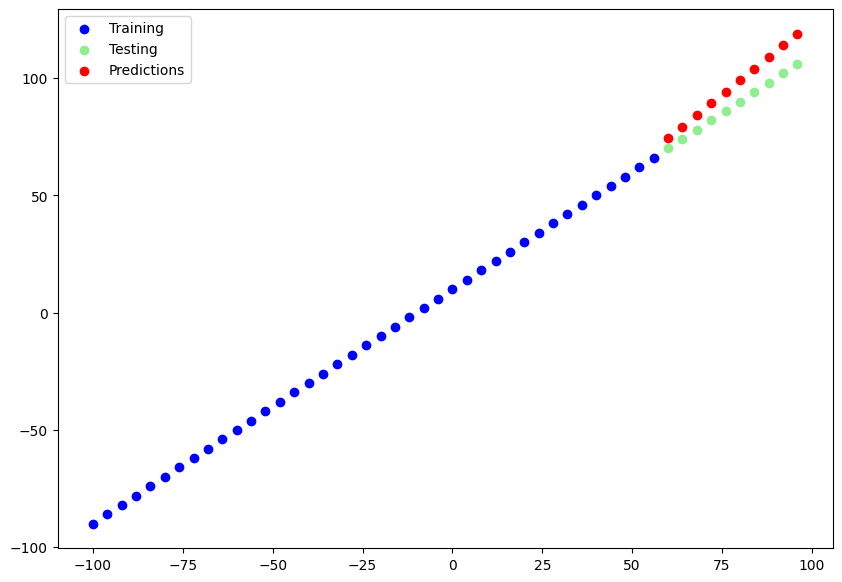

In [242]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_preds_2)

In [243]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(tf.constant(y_preds_2)))
mse_2 = mse(y_test, tf.squeeze(tf.constant(y_preds_2)))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=8.6137905>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.573166>)

**Build `model_3`**
* 3 layers, trained for 500 epochs

In [244]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 36.7690 - mae: 36.7690
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 31.4473 - mae: 31.4473
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 25.6075 - mae: 25.6075
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 20.7374 - mae: 20.7374
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 18.8111 - mae: 18.8111
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 18.3730 - mae: 18.3730
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 18.0733 - mae: 18.0733
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 18.0361 - mae: 18.0361
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 22.0532 - mae: 22.0532
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 17.6897 - mae: 17.6897
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 87ms/step


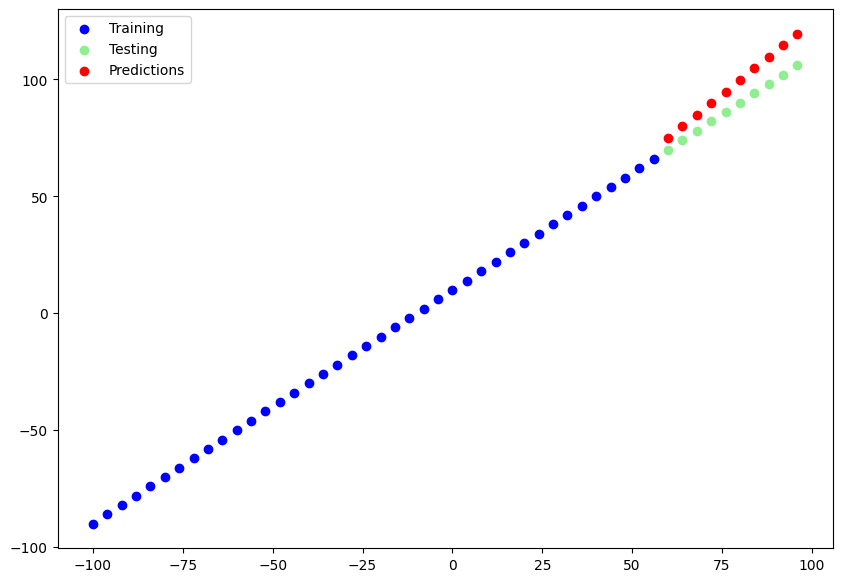

In [245]:
# Make and plot some predictions
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_preds_3)

In [246]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(tf.constant(y_preds_3)))
mse_3 = mse(y_test, tf.squeeze(tf.constant(y_preds_3)))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=9.213464>,
 <tf.Tensor: shape=(), dtype=float32, numpy=92.283005>)

🔑**Note:** Start with small experiments (small models) and make sure they work and scale up the complexity

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [247]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

model_results = pd.DataFrame(model_results,
                             columns=['model', 'mae', 'mse'])
model_results

,model,mae,mse
0,model_1,14.995496,225.715378
1,model_2,8.613791,81.573166
2,model_3,9.213464,92.283005


`model_2` performed the best.

In [248]:
model_2.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16)                32        
                                                                 
 dense_100 (Dense)           (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**Note:** One of the main goals should be to minimize the time between the experiments performed, the more things can be figured out what does work and what doesn't, Remember the ML Practioner's moto: 'Experiment, Experiment, Experiment...'

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of the experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, There are tools to help us!

📖**Resource:** As you build more models, you will want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (We'll see this one later).
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [249]:
# Save model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [250]:
# Save model using the HDF5
model_2.save('best_model_HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading a Saved model

In [251]:
# Load in the SavedModel format
loaded_saved_format_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_format_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16)                32        
                                                                 
 dense_100 (Dense)           (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [252]:
model_2.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16)                32        
                                                                 
 dense_100 (Dense)           (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [253]:
# Compare model_2 preds with SavedModel format model preds
model_2_preds = model_2.predict(tf.expand_dims(X_test, axis=-1))
loaded_saved_format_model_preds = loaded_saved_format_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_saved_format_model_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [254]:
mae(y_test, tf.squeeze(tf.constant(model_2_preds))) == mae(y_test, tf.squeeze(tf.constant(loaded_saved_format_model_preds)))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [255]:
# Load in a model using the .h5 format
loaded_h5_format_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_format_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16)                32        
                                                                 
 dense_100 (Dense)           (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [256]:
# Compare the model_2 preds with loaded .h5 model preds
loaded_h5_format_model_preds = loaded_h5_format_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_h5_format_model_preds

1/1 [==============================] - 0s 52ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [257]:
mae(y_test, tf.squeeze(tf.constant(model_2_preds))) == mae(y_test, tf.squeeze(tf.constant(loaded_h5_format_model_preds)))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Download a model (or any other file) from Google COlab

If you want to download your files from Google Colab:
1. You can go to the 'files' tab and right click on the file you're after and click 'download'.
2. Use code (see the cell below).
3. Save it to Google Drive.

In [258]:
# Download a file from Google Colab
from google.colab import files
files.download('best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [259]:
# Save a file from Google Colab to Google Drive (requires mounting drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow

In [260]:
!ls /content/drive/MyDrive/TensorFlow

best_model_HDF5_format.h5  Neural-Network-Regression-with-TensorFlow-01  TensorFlow-Fundamentals-00


### A larger example

In [278]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [279]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [280]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [281]:
ins_one_hot = pd.get_dummies(insurance).head()
ins_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [282]:
# Create X & y values (features and labels)
X = ins_one_hot.drop('charges', axis=1)
y = ins_one_hot['charges']

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

ins_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
ins_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                  metrics=['mae'])

# Fit the model
ins_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 382ms/step - loss: 11786.4482 - mae: 11786.4482
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11781.6250 - mae: 11781.6250
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11776.7227 - mae: 11776.7227
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11771.7119 - mae: 11771.7119
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11766.5596 - mae: 11766.5596
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11761.2373 - mae: 11761.2373
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11755.7090 - mae: 11755.7090
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11749.9404 - mae: 11749.9404
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11743.8975 - mae: 11743.8975
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11737.5430 - mae: 11

In [283]:
# Check the results of the ins model on the test data
ins_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 2165.1638 - mae: 2165.1638


[2165.163818359375, 2165.163818359375]

Right now it looks like our model isn't performing too well... let's try and improve it!

In [284]:
# Build an improved version of the previous model by tuning parameters
tf.random.set_seed(42)

ins_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
ins_model_2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae'])

# Fit the model
ins_model_2.fit(X_train, y_train, epochs=100, verbose=0)


In [285]:
# Evaluate the larger model
ins_model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 864.4040 - mae: 864.4040


[864.4039916992188, 864.4039916992188]

In [286]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above)
ins_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
ins_model_3.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae'])

# Fit the model
history = ins_model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [287]:
# Evaluate our third model
ins_model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 112ms/step - loss: 837.7614 - mae: 837.7614


[837.7614135742188, 837.7614135742188]

Text(0.5, 0, 'Epoch')

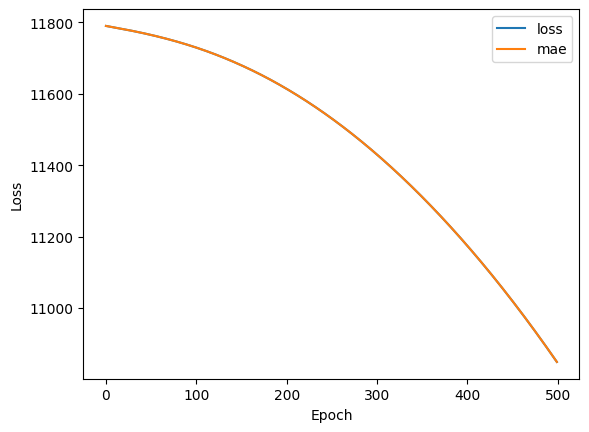

In [288]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epoch')

> 🤔**Question:** How long should you train for?

It depends. Really... It depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the data
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [290]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Create a column transformer
ct = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['sex', 'smoker', 'region']),
    (MinMaxScaler(), ['age', 'bmi', 'children'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


In [291]:
X_train.shape

(1070, 11)

Great! Our data has been normalized and one hot encoded.

Now let's build a neural network model on it and see how it goes.

In [306]:
# Build a neural network mdoel to fit on our normalized data
tf.random.set_seed(42)

# Create the model
ins_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
ins_model_4.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                  metrics=['mae'])

# Fit the model
history = ins_model_4.fit(X_train, y_train, epochs=500, verbose=0)


Text(0.5, 0, 'Epoch')

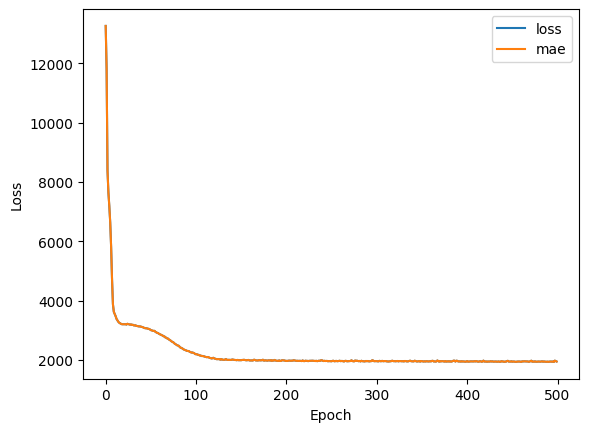

In [307]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [308]:
# Evaluate our ins model trained on normalized data
ins_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1759.9471 - mae: 1759.9471


[1759.9471435546875, 1759.9471435546875]

### 01. Neural network regression with TensorFlow Exercises

> refer to [Exercise page on Git-Hub](https://github.com/mrdbourke/tensorflow-deep-learning?tab=readme-ov-file#-00-tensorflow-fundamentals-exercises)

In [309]:
# 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
tf.random.set_seed(42)

X = tf.random.uniform([100], -200, 200, seed=42)
y = 2*X + 5

X, y

(<tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([ -33.47888  ,  -92.56735  ,   -8.1267395,  -54.171463 ,
         181.88458  ,  176.74585  ,   45.93358  ,  -56.631424 ,
          37.440964 , -113.795616 , -169.01932  ,   31.685257 ,
         -83.27842  ,  -93.12787  ,  -51.950165 ,   86.441315 ,
         -16.488937 , -152.94174  , -115.705154 ,   17.678925 ,
         195.92276  ,  -46.416565 , -181.26573  ,  148.73846  ,
         -96.47317  ,  149.254    ,   58.79373  ,  -32.075073 ,
        -103.406906 , -161.79977  ,  192.83276  , -137.19168  ,
         -80.09271  ,  -52.81877  ,  178.14865  , -155.77287  ,
           9.150513 ,  132.21765  , -199.17116  ,  183.76135  ,
         142.52008  ,  -42.220123 , -111.8845   ,   68.26428  ,
        -192.49701  ,   -7.7717743,   38.138153 ,   73.89316  ,
        -124.04423  , -150.04053  ,  -64.2735   ,   16.380936 ,
          34.34262  ,  191.71213  , -199.64833  ,  133.32986  ,
          29.216293 , -139.97379  , -154.41708  ,  193.

In [312]:
# 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['mae'])

model.fit(tf.expand_dims(X[:80], axis=-1), y[:80], epochs=100, verbose=0)

model.evaluate(tf.expand_dims(X[80:], axis=-1), y[80:])

1/1 [==============================] - 0s 123ms/step - loss: 1.3503 - mae: 1.3503


[1.3503168821334839, 1.3503168821334839]

In [313]:
# 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
# 9/9 [==============================] - 0s 2ms/step - loss: 1759.9471 - mae: 1759.9471
[1759.9471435546875, 1759.9471435546875]

[1759.9471435546875, 1759.9471435546875]

In [316]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train[:5], y_train[:5]

57026/57026 [==============================] - 0s 0us/step


(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
         6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
         2.10000e+01, 3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
         7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
         1.47000e+01, 3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
         4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.75520e+02, 3.26000e+00],
        [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
         6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
         2.02000e+01, 3.96900e+02, 8.01000e+00],
        [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
         6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.91430e+02, 1.46500e+01]]),
 array([15.2,

In [317]:
len(X_train), len(X_test)

(404, 102)

Text(0, 0.5, 'Loss')

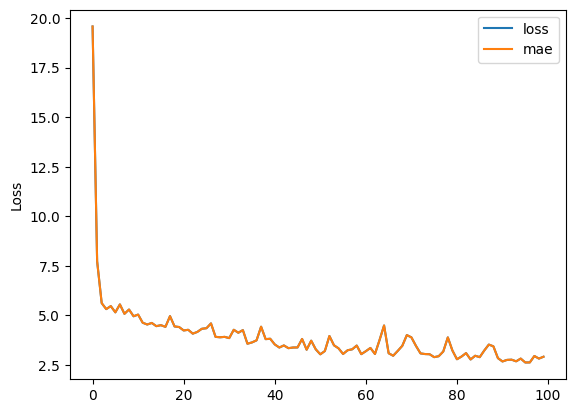

In [320]:
# Create a housing model for our boston housing dataset
housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
housing_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                  metrics=['mae'])

# Fit the model and plot the history
history = housing_model.fit(X_train, y_train, epochs=100, verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')

In [321]:
housing_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.5328 - mae: 3.5328


[3.5327675342559814, 3.5327675342559814]